### Importing Libraries

In [4]:
#importing necessary libraries

#Data Manipulation
import numpy as np
import pandas as pd
import re
import string

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#Machine learning libraries for training model and performance metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Loading Dataset

In [6]:
import csv
import random

dataset = []

# Open the CSV file using the 'ISO-8859-1' encoding
with open('/content/Sentiment_Analysis_1.6.csv', 'r', encoding='ISO-8859-1') as csv_file:
    csv_reader = csv.reader(csv_file)
    headers = next(csv_reader)  # Read and store the headers
    for row in csv_reader:
        if len(row) > 1:
            dataset.append(row)

# Shuffle the data randomly
random.shuffle(dataset)

# Calculate the number of rows for a 50% sample
sample_size = int(0.5 * len(dataset))

# Create a DataFrame from the random sample and headers
data = pd.DataFrame(dataset[:sample_size], columns=headers)


In [7]:
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1468631882,Tue Apr 07 02:50:45 PDT 2009,NO_QUERY,DebbieJay,I sooo cannot afford to get an iPhone
1,0,1548885063,Fri Apr 17 22:17:07 PDT 2009,NO_QUERY,aquapoet,is going with her father to the emergency room.
2,0,1553366911,Sat Apr 18 14:04:33 PDT 2009,NO_QUERY,drea151,bored nd mad looks like its gna rain
3,0,1468511008,Tue Apr 07 02:06:59 PDT 2009,NO_QUERY,akkiebardoel,It is snowing in Tennessee too!!
4,0,1551415828,Sat Apr 18 09:00:06 PDT 2009,NO_QUERY,ARoadRetraveled,@BearTwinsMom Oh no!!! I hope you haven't lost...


In [8]:
x=['target','ids','date','flag','user','text']

In [9]:
#changing the column names
data.columns=x

In [10]:
data.head(10)

,target,ids,date,flag,user,text
0,0,1468631882,Tue Apr 07 02:50:45 PDT 2009,NO_QUERY,DebbieJay,I sooo cannot afford to get an iPhone
1,0,1548885063,Fri Apr 17 22:17:07 PDT 2009,NO_QUERY,aquapoet,is going with her father to the emergency room.
2,0,1553366911,Sat Apr 18 14:04:33 PDT 2009,NO_QUERY,drea151,bored nd mad looks like its gna rain
3,0,1468511008,Tue Apr 07 02:06:59 PDT 2009,NO_QUERY,akkiebardoel,It is snowing in Tennessee too!!
4,0,1551415828,Sat Apr 18 09:00:06 PDT 2009,NO_QUERY,ARoadRetraveled,@BearTwinsMom Oh no!!! I hope you haven't lost...
5,0,1468633491,Tue Apr 07 02:51:19 PDT 2009,NO_QUERY,PartyPlanPat,"@divapromotions I agree, sendout cards rocks! ..."
6,0,1553395044,Sat Apr 18 14:09:05 PDT 2009,NO_QUERY,kisshippie13,Just woke up from nap! It made me feel so much...
7,0,1548877716,Fri Apr 17 22:15:39 PDT 2009,NO_QUERY,myzzkay,mannnn i gern out man lol i cnt take being gan...
8,0,1468570896,Tue Apr 07 02:28:51 PDT 2009,NO_QUERY,tinker6274,mommy... is school closed today?
9,0,1553146372,Sat Apr 18 13:29:46 PDT 2009,NO_QUERY,ImWithYourBand,upset that some of my favorite bands aren't pl...


In [11]:
data.tail()

,target,ids,date,flag,user,text
7016,0,1467984655,Mon Apr 06 23:07:14 PDT 2009,NO_QUERY,dreaaa,@crummyasshole i don't like that they only had...
7017,0,1467863507,Mon Apr 06 22:33:32 PDT 2009,NO_QUERY,Mirlina,My nap was interrupted so many times today Go...
7018,0,1553082876,Sat Apr 18 13:19:43 PDT 2009,NO_QUERY,Wizz_Dumb,@StarrahPenzHitz I LOVE &quot;ERYN&quot; YOUR ...
7019,0,1551454887,Sat Apr 18 09:06:08 PDT 2009,NO_QUERY,magistracl,Can't find my brown shoes.
7020,0,1468476659,Tue Apr 07 01:54:29 PDT 2009,NO_QUERY,harudori,@greyhoundgal omg front page! i'd be so excite...


In [12]:
data['target'].value_counts()

0    7021
Name: target, dtype: int64

In [13]:
data.shape

(7021, 6)

The number of columns in the dataset is 6 and number of records are 593428.But as we have took the random 50% of the data, it will show 50% records.

In [14]:
data.dtypes

target    object
ids       object
date      object
flag      object
user      object
text      object
dtype: object

Here, we can observe that the target column, ids column and date column types are object. we have to change them to integer and date.

###Converting the Data type

In [15]:
data['target'] = data['target'].astype(int)
data['ids'] = data['ids'].astype(int)
data['date'] = pd.to_datetime(data['date'],errors='coerce')

data.dtypes

target             int64
ids                int64
date      datetime64[ns]
flag              object
user              object
text              object
dtype: object

In [16]:
# Assuming data is your DataFrame with the 'date' column converted to datetime
invalid_date = data['date'].isnull()

# Filter out rows with invalid dates
df = data[~invalid_date]

# Display the DataFrame without invalid dates
print(df)

      target         ids                date      flag             user  \
0          0  1468631882 2009-04-07 02:50:45  NO_QUERY        DebbieJay   
1          0  1548885063 2009-04-17 22:17:07  NO_QUERY         aquapoet   
2          0  1553366911 2009-04-18 14:04:33  NO_QUERY          drea151   
3          0  1468511008 2009-04-07 02:06:59  NO_QUERY     akkiebardoel   
4          0  1551415828 2009-04-18 09:00:06  NO_QUERY  ARoadRetraveled   
...      ...         ...                 ...       ...              ...   
7016       0  1467984655 2009-04-06 23:07:14  NO_QUERY           dreaaa   
7017       0  1467863507 2009-04-06 22:33:32  NO_QUERY          Mirlina   
7018       0  1553082876 2009-04-18 13:19:43  NO_QUERY        Wizz_Dumb   
7019       0  1551454887 2009-04-18 09:06:08  NO_QUERY       magistracl   
7020       0  1468476659 2009-04-07 01:54:29  NO_QUERY         harudori   

                                                   text  
0                I sooo cannot afford to 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7020
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   target  7021 non-null   int64         
 1   ids     7021 non-null   int64         
 2   date    7021 non-null   datetime64[ns]
 3   flag    7021 non-null   object        
 4   user    7021 non-null   object        
 5   text    7021 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 384.0+ KB


In [18]:
df.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
df['flag'].value_counts()

NO_QUERY    7021
Name: flag, dtype: int64

In [21]:
df['target'].nunique()

1

In [22]:
df['target'].value_counts()

0    7021
Name: target, dtype: int64

In [23]:
df['target'] = df['target'].replace(4,1)
df['target'].value_counts()

0    7021
Name: target, dtype: int64

###Dropping Redundant columns

In [24]:
#dropping the unncessary columns
df= df.drop(["ids","date","flag","user"],axis=1)

In [25]:
#let us check the first 5 data of the columnn 'text'
print(df['text'].iloc[0],"\n")
print(df['text'].iloc[1],"\n")
print(df['text'].iloc[2],"\n")
print(df['text'].iloc[3],"\n")
print(df['text'].iloc[4],"\n")

I sooo cannot afford to get an iPhone  

is going with her father to the emergency room.  

bored nd mad looks like its gna rain  

It is snowing in Tennessee too!!  

@BearTwinsMom Oh no!!! I hope you haven't lost your voice again  



Here we can observe that the text contains lot of inconsistent data. we need to remove the inconsistent data.

In [26]:
# Check data types and values in the 'text' column
print(df['text'].apply(type))


0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
7016    <class 'str'>
7017    <class 'str'>
7018    <class 'str'>
7019    <class 'str'>
7020    <class 'str'>
Name: text, Length: 7021, dtype: object


In [27]:
print(df['text'].unique())

['I sooo cannot afford to get an iPhone '
 'is going with her father to the emergency room. '
 'bored nd mad looks like its gna rain ' ...
 '@StarrahPenzHitz I LOVE &quot;ERYN&quot; YOUR MELODIES/NOTE SELECTIONS WERE VERY VERY DOPE! THE SONG IS HOT AS WELL, I WISH I HAD THE FULL VERSION. '
 "Can't find my brown shoes. "
 "@greyhoundgal omg front page! i'd be so excited, congratulations. sorry about torres hurting his paw tho  is that your dog?"]


### Data Preprocessing

-- Changing the case
-- Removing inconsistent data
-- Tokenization
-- Removing stopwords
-- Text Normalization(Stemming and Lemmatization)

In [28]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

The Punkt tokenizer is designed to perform sentence tokenization, which means it divides a text document into individual sentences. It's named after the German word "punkt," which means "point" or "period." Sentence tokenization is the process of identifying the boundaries of sentences in a text.

####Converting to lower case

In [29]:
# Converting to Lower case

df['text']=df['text'].str.lower()
df['text'].head()

0               i sooo cannot afford to get an iphone 
1     is going with her father to the emergency room. 
2                bored nd mad looks like its gna rain 
3                    it is snowing in tennessee too!! 
4    @beartwinsmom oh no!!! i hope you haven't lost...
Name: text, dtype: object

Removing URLS

In [30]:
import re

def cleaning_URLs(data):
  # Check if the input is a string
    if isinstance(data, str):
        return re.sub('((www.[^s]+)|(https?://[^s]+))', ' ', data)
    else:
        return data  # Return the data unchanged if it's not a string
df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))
df['text'].head()

0               i sooo cannot afford to get an iphone 
1     is going with her father to the emergency room. 
2                bored nd mad looks like its gna rain 
3                    it is snowing in tennessee too!! 
4    @beartwinsmom oh no!!! i hope you haven't lost...
Name: text, dtype: object

Remove Non-Alphanumeric character

In [31]:
def non_alphanumeric(text):
    return re.sub(r'[^\w\s]', '', text)
df['text']=df['text'].apply(lambda x: non_alphanumeric(x))
df['text'].head()

0               i sooo cannot afford to get an iphone 
1      is going with her father to the emergency room 
2                bored nd mad looks like its gna rain 
3                      it is snowing in tennessee too 
4    beartwinsmom oh no i hope you havent lost your...
Name: text, dtype: object

Remove @, # from the Data

In [32]:
def ref(text):
    return re.sub(r'\@\w+|\#', '', text)
df['text'] = df['text'].apply(lambda x:ref(x))
df['text'].head()

0               i sooo cannot afford to get an iphone 
1      is going with her father to the emergency room 
2                bored nd mad looks like its gna rain 
3                      it is snowing in tennessee too 
4    beartwinsmom oh no i hope you havent lost your...
Name: text, dtype: object

Remove special characters,numbers and punctuations

In [33]:
df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ")
df['text'].head()

0               i sooo cannot afford to get an iphone 
1      is going with her father to the emergency room 
2                bored nd mad looks like its gna rain 
3                      it is snowing in tennessee too 
4    beartwinsmom oh no i hope you havent lost your...
Name: text, dtype: object

Remove extra whitespaces

In [34]:
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True)
df['text'].head()

0               i sooo cannot afford to get an iphone 
1      is going with her father to the emergency room 
2                bored nd mad looks like its gna rain 
3                      it is snowing in tennessee too 
4    beartwinsmom oh no i hope you havent lost your...
Name: text, dtype: object

Remove Short Words

In [35]:
df['text'] = df['text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,target,text
0,0,sooo cannot afford iphone
1,0,going with father emergency room
2,0,bored looks like rain
3,0,snowing tennessee
4,0,beartwinsmom hope havent lost your voice again


##Stemming

 Stemming
  It involves reducing words to their root or base form, known as the "stem."
  The goal of stemming is to transform related words into a common form
  to simplify text analysis and improve information retrieval.
  Example like "running," "runs," and "ran" to their common root form, "run."

  PorterStemmer() is used to perform stemming on a list of words.

In [36]:
ps=PorterStemmer()

def stemming(data):
    stemmed_word = [ps.stem(w) for w in data.split()]
    stemmed_text = ' '.join(stemmed_word)
    return stemmed_text

In [37]:
df['text'] = df['text'].apply(lambda x:stemming(x))

##Tokenization

In [38]:
# Tokenizing the text
#from nltk.tokenize import RegexpTokenizer
#tokenizer = RegexpTokenizer(r'\w+')
#df['text'] = df['text'].apply(tokenizer.tokenize)
#df['text'].head()

In [39]:
df.head(10)

,target,text
0,0,sooo cannot afford iphon
1,0,go with father emerg room
2,0,bore look like rain
3,0,snow tennesse
4,0,beartwinsmom hope havent lost your voic again
5,0,divapromot agre sendout card rock just sent to...
6,0,just woke from made feel much better wwoot stu...
7,0,mannnn gern take be gang
8,0,mommi school close today
9,0,upset that some favorit band arent play warp t...


In [40]:
df['target'].value_counts()

0    7021
Name: target, dtype: int64

In [41]:
#let us check the first 5 data of the columnn 'text'
print(df['text'].iloc[0],"\n")
print(df['text'].iloc[1],"\n")
print(df['text'].iloc[2],"\n")
print(df['text'].iloc[3],"\n")
print(df['text'].iloc[4],"\n")

sooo cannot afford iphon 

go with father emerg room 

bore look like rain 

snow tennesse 

beartwinsmom hope havent lost your voic again 



In [42]:
df.shape

(7021, 2)

###Removal of Stopwords

In [43]:
import os
import nltk.data
nltk.data.find('corpora/stopwords')
#nltk.data.path.append('/content')
nltk.data.path.append('/content/to/nltk_data')

In [44]:
import nltk
nltk.download('stopwords', download_dir='/path/to/nltk_data')

[nltk_data] Downloading package stopwords to /path/to/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
stop=stopwords.words('english')
stop_words=['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']
stop.extend(stop_words)

In [46]:
df['text']=df['text'].apply(lambda x:" ".join([word for word in x.split() if word not in stop]))
df.text.head()

0              sooo cannot afford iphon
1                  go father emerg room
2                   bore look like rain
3                         snow tennesse
4    beartwinsmom hope havent lost voic
Name: text, dtype: object

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  7021 non-null   int64 
 1   text    7021 non-null   object
dtypes: int64(1), object(1)
memory usage: 164.6+ KB


##Polarity and Subjectivity
Polarity means how positive or negative the text is the value of polarity lies between -1 to 1
negative value indicates that the sentiment is not good
positive value indicates that the sentiment is good

Subjectivity means statement or opinion or piece of text influenced by personal feelings
The value of subjectivity relates to whether it is a public opinion or its factual information
the value of subjectivity lies between 0 to 1.


In [48]:
from textblob import TextBlob
from textblob import Word

In [49]:
df['text'] = df['text'].astype(str)
polarity_score = []

for i in range(0, df.shape[0]):
    score = TextBlob(df.iloc[i]['text'])
    sent_score = score.sentiment.polarity
    polarity_score.append(sent_score)
#return polarity_score

In [50]:
df=pd.concat([df,pd.Series(polarity_score)],axis=1)

In [51]:
df.head()

,target,text,0
0,0,sooo cannot afford iphon,0.0
1,0,go father emerg room,0.0
2,0,bore look like rain,0.0
3,0,snow tennesse,0.0
4,0,beartwinsmom hope havent lost voic,0.0


In [52]:
df.rename(columns={df.columns[2]:"Polarity"},inplace=True)

In [53]:
df.head()

,target,text,Polarity
0,0,sooo cannot afford iphon,0.0
1,0,go father emerg room,0.0
2,0,bore look like rain,0.0
3,0,snow tennesse,0.0
4,0,beartwinsmom hope havent lost voic,0.0


In [54]:
df['target'] = df['target'].apply(lambda x: 'negative' if x == 0 else 'positive' if x == 1 else x)

In [55]:
df['target'].value_counts()

negative    7021
Name: target, dtype: int64

In [56]:
def sentiment(label):
    if label<0:
      return "negative"
    else:
      return "positive"


In [57]:
df['Sentiment']=df['Polarity'].apply(sentiment)

In [58]:
df.head()

,target,text,Polarity,Sentiment
0,negative,sooo cannot afford iphon,0.0,positive
1,negative,go father emerg room,0.0,positive
2,negative,bore look like rain,0.0,positive
3,negative,snow tennesse,0.0,positive
4,negative,beartwinsmom hope havent lost voic,0.0,positive


##EDA

<Axes: xlabel='Sentiment', ylabel='count'>

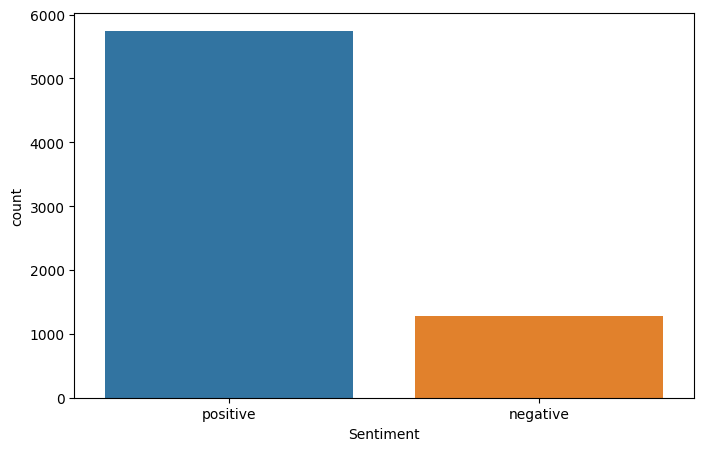

In [59]:
fig = plt.figure(figsize=(8,5))
sns.countplot(x='Sentiment',data=df)

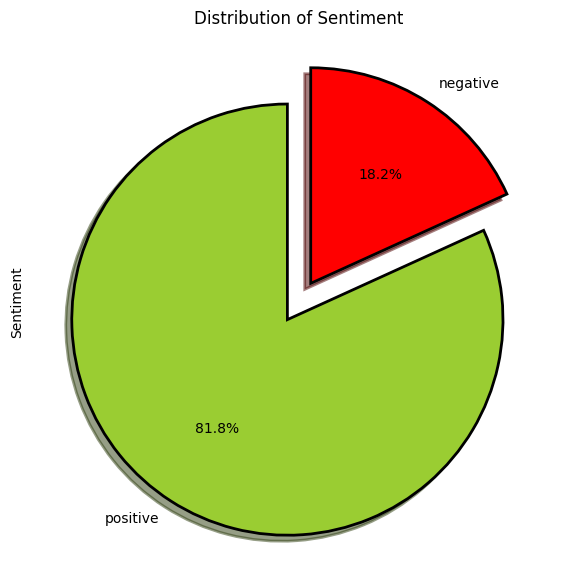

In [60]:
#Distribution plot of Sentiment
tags = df['Sentiment'].value_counts()
explode = (0.1, 0.1)
colors = ("yellowgreen", "red")
wp = {"linewidth": 2, "edgecolor": "black"}

fig = plt.figure(figsize=(7,7))
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
          startangle=90, wedgeprops=wp, explode=explode, labels=['positive', 'negative'])
plt.title("Distribution of Sentiment")
plt.show()

In [61]:
positive_tweet = df[df['Sentiment'] == 'positive']
positive_tweet = positive_tweet.sort_values(['Polarity'],ascending=False)
positive_tweet.head()

,target,text,Polarity,Sentiment
6997,negative,redvinylgirl wish best luck,1.0,positive
3233,negative,rach mccoyl wick ring work arrang miss best bu...,1.0,positive
3163,negative,best birthday ever hous sold,1.0,positive
1776,negative,ruff point dollar thank best news,1.0,positive
539,negative,hous look buy drop price tempt best time indoo...,1.0,positive


In [62]:
!pip install wordcloud

In [63]:
from wordcloud import WordCloud

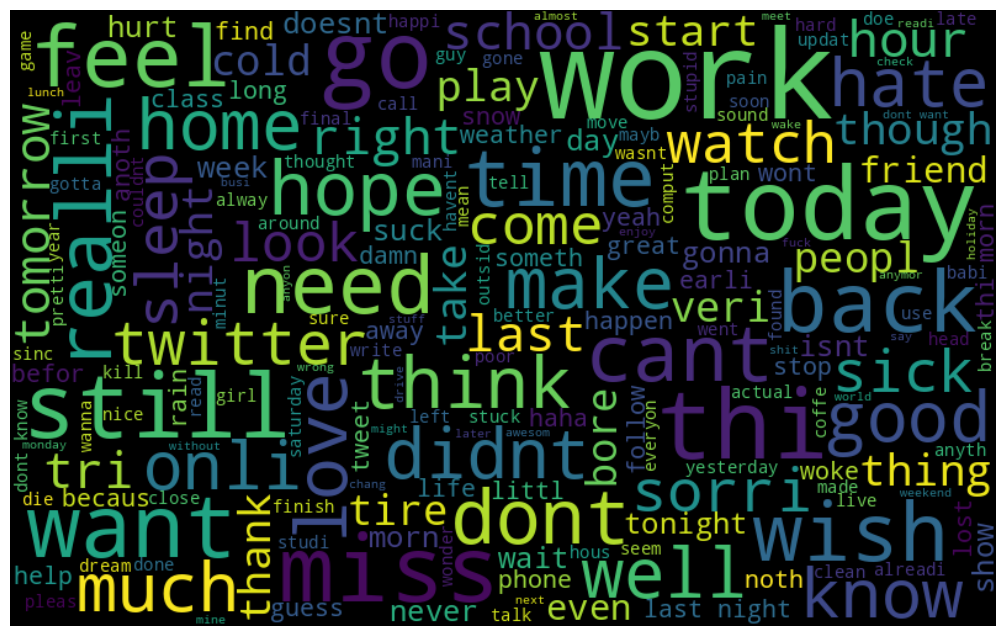

In [64]:
# visualize the frequent words

all_words = " ".join([sentence for sentence in df['text']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [65]:
# Drop rows with NaN values in the 'Text' column
positive_tweet = positive_tweet.dropna(subset=['text'])

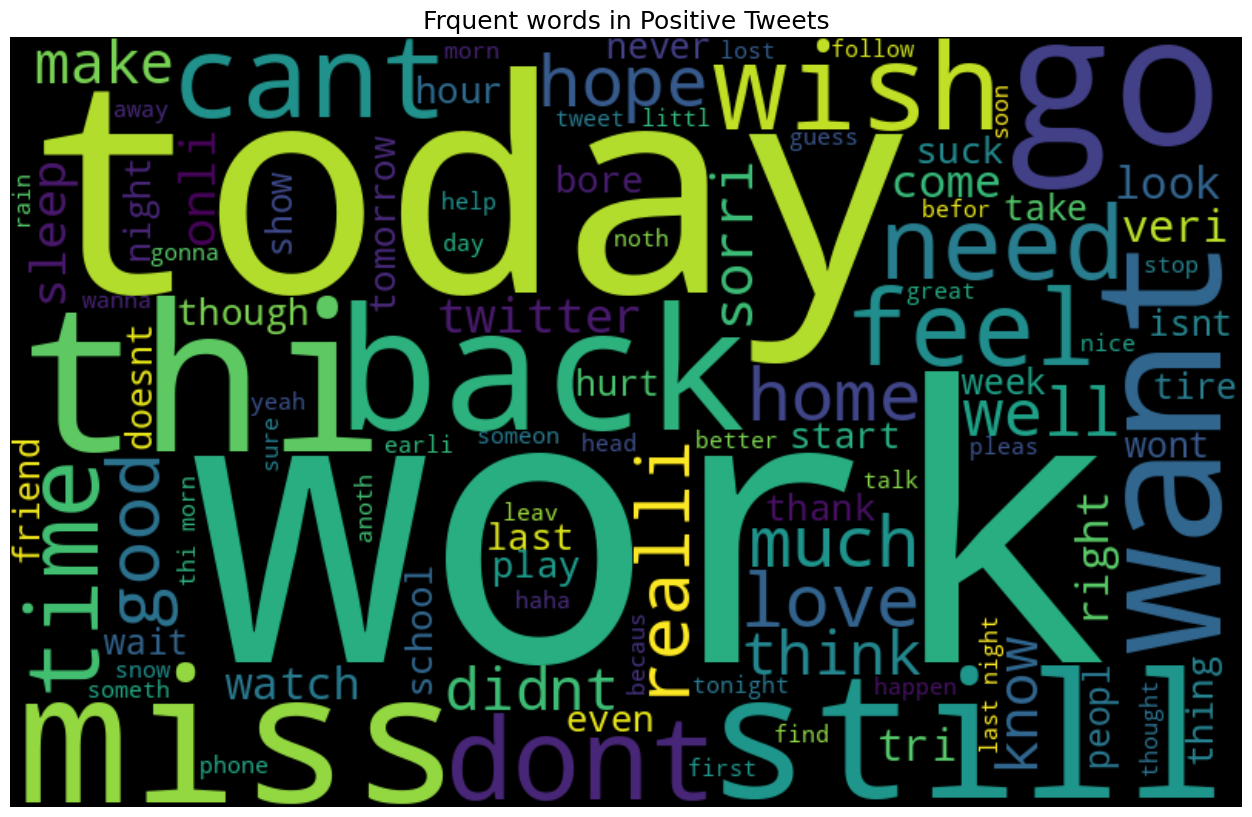

In [66]:
text = ' '.join([str(word) for word in positive_tweet['text']])
plt.figure(figsize=(20,10),facecolor='None')
wordcloud = WordCloud(max_words=100,width=800,height=500).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title("Frquent words in Positive Tweets",fontsize=18)
plt.show()


In [67]:
negative_tweet = df[df['Sentiment'] == 'negative']
negative_tweet = negative_tweet.sort_values(['Polarity'],ascending=False)
negative_tweet.head()

,target,text,Polarity,Sentiment
3945,negative,nilelegania glad abl help feel better hate sic...,-0.002857,negative
4869,negative,mcjonasprincess right hard cant wait brazil sh...,-0.002976,negative
5726,negative,deathburlesqu love summer cannot come fast eno...,-0.003571,negative
2059,negative,smile like mean thi song bring back memori sti...,-0.004167,negative
2757,negative,mileycyru hahaha dont like time min sleep sick...,-0.004762,negative


In [68]:
negative_tweet = negative_tweet.dropna(subset=['text'])

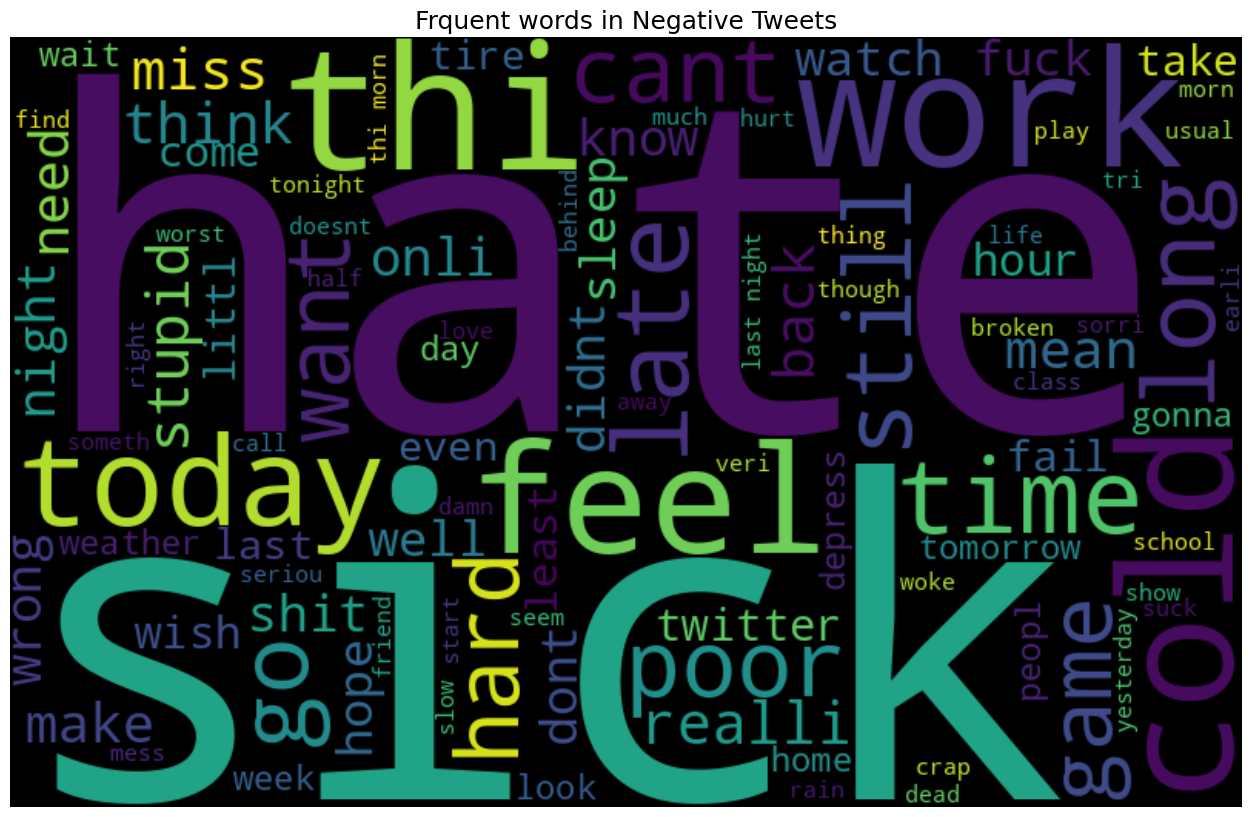

In [69]:
text = ' '.join([str(word) for word in negative_tweet['text']])
plt.figure(figsize=(20,10),facecolor='None')
wordcloud = WordCloud(max_words=100,width=800,height=500).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title("Frquent words in Negative Tweets",fontsize=18)
plt.show()

### Vectorization of Tokens

Vectorization is the process of converting tokens to numbers.It is very important,because the machine learning models do not work with textual data they work with numbers.

TfIdfvectorizer:
The TfidfVectorizer is used to convert a collection of text documents into a TF-IDF matrix, where each row represents a document, and each column represents a unique word (feature). The values in the matrix represent the TF-IDF weights of each word in each document.

Term Frequency (TF):  calculates the frequency of each word (term) in a document
Inverse Document Frequency (IDF): It measures how unique or rare a term is across all the documents in the corpus.



In [70]:
vect = TfidfVectorizer(ngram_range=(1,2),sublinear_tf=True).fit(df['text'])

In [71]:
feature_names = vect.get_feature_names_out()
print("Number of features:{}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features:43039

First 20 features:
 ['aaaaaaaa' 'aaaaaaaaaah' 'aaaaaaaaaah still' 'aaaaaaaaah' 'aaaaand'
 'aaaaand back' 'aaaaargh' 'aaaaargh suck' 'aaaah' 'aaaah jadi' 'aaand'
 'aaand gone' 'aaarrrrrgh' 'aaarrrrrgh agent' 'aaaw' 'aaaw okay' 'aaghh'
 'aaghh work' 'aahh' 'aaliyah']


In [72]:
X = df['text']
y = df['Sentiment']
X = vect.fit_transform(X)

##Data Splitting

In [73]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [74]:
#to save the cleaned data for visualization purpose
cleaned_data=df
#cleaned_data
cleaned_data.to_csv('cleaned_data.csv', index=False)

In [75]:
from google.colab import files

# Download a specific file
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,r2_score

In [77]:
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [78]:
#Size of all
print("size of X_train:",(X_train.shape))
print("size of y_train:",(y_train_encoded.shape))
print("size of X_test:",(X_test.shape))
print("size of y_test:",(y_test_encoded.shape))

size of X_train: (5616, 43039)
size of y_train: (5616,)
size of X_test: (1405, 43039)
size of y_test: (1405,)


In [79]:
y_test_encoded = y_test_encoded.astype(int)

##Logistic Regression

In [80]:
lr = LogisticRegression()
lr.fit(X_train,y_train_encoded)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(lr_pred,y_test_encoded)
lr_r2 = r2_score(lr_pred,y_test_encoded)
print("Test accuracy: {:.2f}%".format(lr_acc*100))
print("R2 Score: {:.2f}%".format(lr_r2*100))

Test accuracy: 83.63%
R2 Score: -538.43%


In [81]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_encoded,lr_pred))
print("\n")

[[  37  230]
 [   0 1138]]




##Navie Bayes Classifier

In [82]:
# Create and train the Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train_encoded)
nb_pred = nb.predict(X_test)
# Calculate accuracy and R-squared
nb_acc = accuracy_score(nb_pred, y_test_encoded)
nb_r2 = r2_score(nb_pred, y_test_encoded)
print("Naive Bayes Test Accuracy: {:.2f}%".format(nb_acc * 100))
print("Naive Bayes R2 Score: {:.2f}%".format(nb_r2 * 100))

Naive Bayes Test Accuracy: 81.21%
Naive Bayes R2 Score: -8718.83%


In [83]:
nb_confusion_matrix = confusion_matrix(y_test_encoded, nb_pred)
print("Confusion Matrix (Naive Bayes):")
print(nb_confusion_matrix)

Confusion Matrix (Naive Bayes):
[[   3  264]
 [   0 1138]]


##Random Forest Classifier

In [84]:
# Create and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=30,random_state=42)
rf.fit(X_train, y_train_encoded)
rf_pred = rf.predict(X_test)
# Calculate accuracy and R-squared
rf_acc = accuracy_score(rf_pred, y_test_encoded)
rf_r2 = r2_score(rf_pred, y_test_encoded)

print("Random Forest Test Accuracy: {:.2f}%".format(rf_acc * 100))
print("Random Forest R2 Score: {:.2f}%".format(rf_r2 * 100))

Random Forest Test Accuracy: 93.31%
Random Forest R2 Score: 45.87%


In [85]:
rf_confusion_matrix = confusion_matrix(y_test_encoded, rf_pred)
print("Confusion Matrix (Random Forest):")
print(rf_confusion_matrix)

Confusion Matrix (Random Forest):
[[ 188   79]
 [  15 1123]]


##Support Vector Classifier

In [86]:
from sklearn.svm import SVC

# Create and train the SVM classifier
svm = SVC(kernel='linear', C=1.0)

svm.fit(X_train, y_train_encoded)
svm_pred = svm.predict(X_test)

# Calculate accuracy and R-squared
svm_acc = accuracy_score(svm_pred, y_test_encoded)
svm_r2 = r2_score(svm_pred, y_test_encoded)

print("SVM Test Accuracy: {:.2f}%".format(svm_acc * 100))
print("SVM R2 Score: {:.2f}%".format(svm_r2 * 100))


SVM Test Accuracy: 90.82%
SVM R2 Score: 2.58%


In [87]:
svm_confusion_matrix = confusion_matrix(y_test_encoded, svm_pred)
print("Confusion Matrix (SVM):")
print(svm_confusion_matrix)

Confusion Matrix (SVM):
[[ 143  124]
 [   5 1133]]


In [88]:
from sklearn.model_selection import cross_val_score
# Define the models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Naive Bayes', MultinomialNB()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC())
]

#Best Fit Model

In [89]:
#Best model
for name, model in models:
    scores = cross_val_score(model, X_train, y_train_encoded, cv=5, scoring='accuracy')
    print(f'{name}: Mean Accuracy = {scores.mean()}, Std Dev = {scores.std()}')

# Choose the model with the highest mean accuracy
best_model = max(models, key=lambda x: cross_val_score(x[1], X_train, y_train_encoded, cv=5, scoring='accuracy').mean())

print(f'Best Model: {best_model[0]}')

Logistic Regression: Mean Accuracy = 0.8415241964362108, Std Dev = 0.0013806659511709652
Naive Bayes: Mean Accuracy = 0.8228277713166626, Std Dev = 0.0014723493682227556
Random Forest: Mean Accuracy = 0.9282411119174301, Std Dev = 0.004192788172571917
SVM: Mean Accuracy = 0.8518519281411319, Std Dev = 0.00371529331771728
Best Model: Random Forest
